In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# https://www.kaggle.com/tunguz/drug-use-by-age

In [2]:
os.chdir(r"D:\\")

In [3]:
# Đọc file
df = pd.read_csv("drug-use-by-age.csv")
df["oxycontin-frequency"] = df["oxycontin-frequency"].astype("float")
df["alcohol-frequency"] = df["alcohol-frequency"].astype("float")
df.dtypes

age                         object
count                        int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency          int64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency       int64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency      int64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

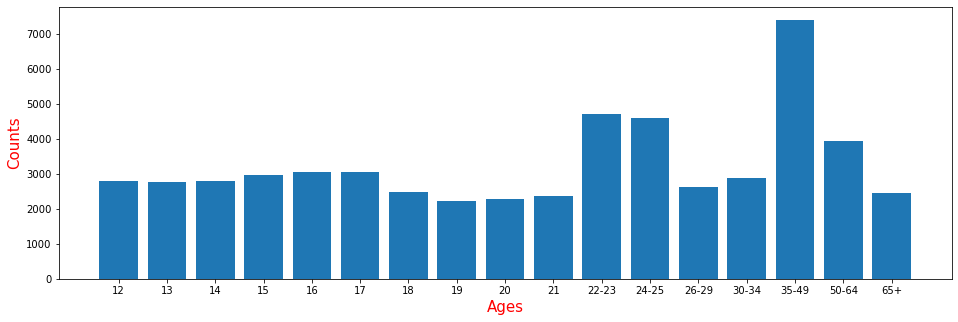

In [4]:
# Biểu đồ số lượng người dùng chất kích thích theo tuổi
f, ax = plt.subplots(figsize=(16,5))
labels = [age for age, df in df.groupby("age")] 
plt.bar(labels, df["count"])
plt.xlabel("Ages", color = "r", fontsize = 15)
plt.ylabel("Counts", color = "r", fontsize = 15)
plt.show()

<Figure size 432x288 with 0 Axes>

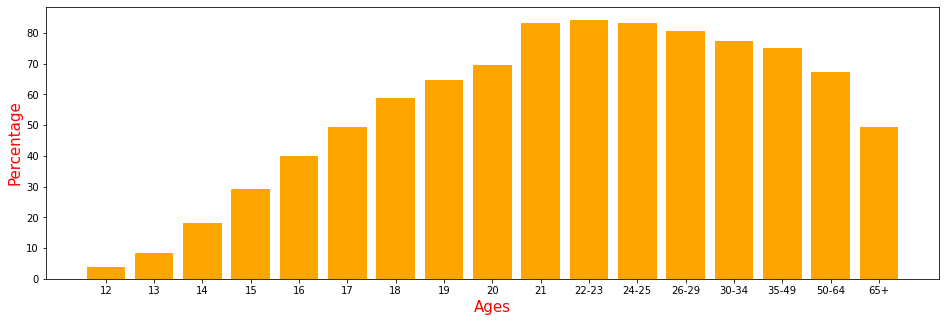

In [5]:
# Biểu đồ giá trị trung bình uống rượu theo tuổi
plt.clf()
f, ax = plt.subplots(figsize=(16,5))
plt.bar(df["age"], df["alcohol-use"], color = "orange")
plt.xlabel("Ages", color = "r", fontsize = 15)
plt.ylabel("Percentage", color = "r", fontsize = 15)
plt.show()

In [6]:
# Thống kê người dùng từ 12 đến 21 tuổi
Total_12_to_21 = df["count"][0:10]
print(Total_12_to_21)
# Thống kê người dùng từ 22 đến hơn 65 tuổi
Total_22_to_65 = df["count"][10:]
print(Total_22_to_65)

0    2798
1    2757
2    2792
3    2956
4    3058
5    3038
6    2469
7    2223
8    2271
9    2354
Name: count, dtype: int64
10    4707
11    4591
12    2628
13    2864
14    7391
15    3923
16    2448
Name: count, dtype: int64


# H0: Không có sự khác biết giữa hai khoảng tuổi này 
# H1 : Có sự khác biệt giữa hai khoảng tuổi này

In [7]:
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(Total_12_to_21, Total_22_to_65)
pval
"""Vì pval < 0.05 nên suy ra là có sự khác biệt về người số lượng người dùng chất kích thích giữa hai khoảng tuổi."""

'Vì pval < 0.05 nên suy ra là có sự khác biệt về người số lượng người dùng chất kích thích giữa hai khoảng tuổi.'

# Có sự liên quan nào giữa tần suất uống rượu và tần số dùng oxycontin hay không?

0.049387898223876486


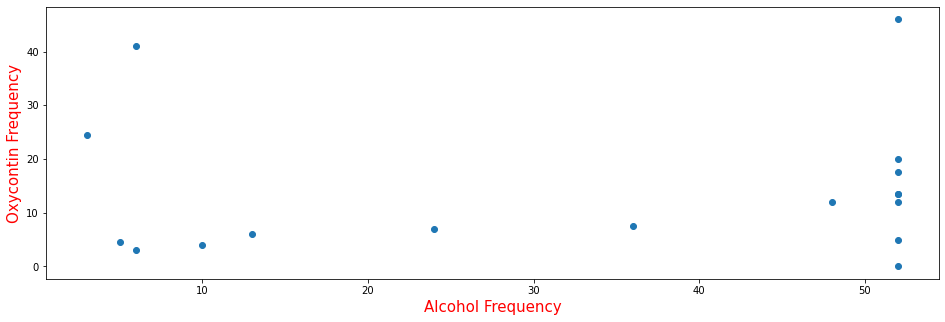

'Từ chỉ số correlation và biểu đồ thì giữa hai tần suất này không có sự liên kết chặt chẽ với nhau. Chỉ có thể thấy được ở những ai uống rượu ít hơn \nhoặc bằng 10 lần trong 12 tháng gần đây với người uống nhiều hơn 50 lần trong 12 tháng gần đây thì có tỉ lệ dùng ít nhất một lần thuốc giảm đau so với những người khác.'

In [36]:
from scipy.stats import pearsonr
# Tính Covariance
covariance_acohol_oxycotin = np.cov(df["oxycontin-frequency"], df["alcohol-frequency"])
# Tính Correlation
correlation, p = pearsonr(df["oxycontin-frequency"], df["alcohol-frequency"])
print(correlation)
# Biểu đồ
f, ax = plt.subplots(figsize=(16,5))
plt.scatter(data = df, x = "alcohol-frequency",y = "oxycontin-frequency")
plt.xlabel("Alcohol Frequency", color = "r", fontsize =15)
plt.ylabel("Oxycontin Frequency", color = "r", fontsize = 15)
plt.show()

"""Từ chỉ số correlation và biểu đồ thì giữa hai tần suất này không có sự liên kết chặt chẽ với nhau. Chỉ có thể thấy được ở những ai uống rượu ít hơn 
hoặc bằng 10 lần trong 12 tháng gần đây với người uống nhiều hơn 50 lần trong 12 tháng gần đây thì có tỉ lệ dùng ít nhất một lần thuốc giảm đau so với những người khác."""

# Tuổi càng cao thì số lượng người dùng chất kích thích có càng giảm không?

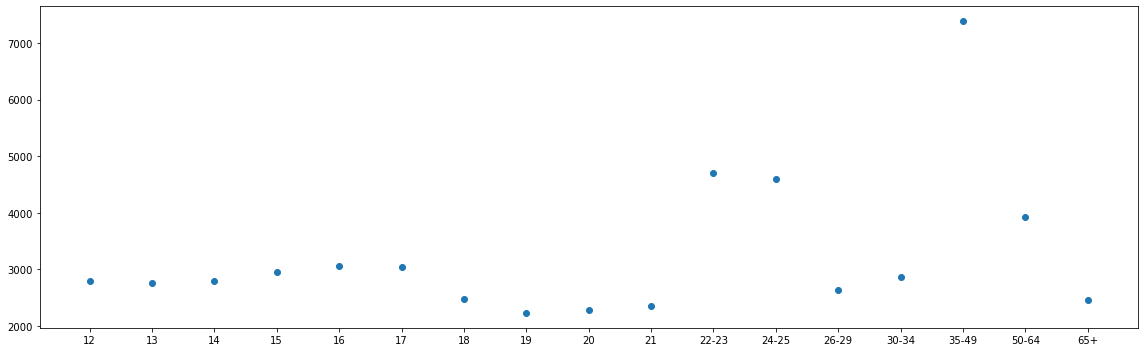

'Từ biểu đồ ta có thể thấy sự tương phản rằng là từ tuổi 12 -> 17 có số lượng người dùng khá cao, vì tuổi này đang trong giai đoạn\ntìm tòi tò mò, từ 18 tuổi -> 21 tuổi thì có lẽ là trong thời gian học tập nên không có thời gian dùng chất kích thích\n. Số lượng người dùng chất kích thích giảm ở giai đoạn 24-25 với 26-29 nhưng đến 30-34 thì tăng nhẹ. Suy ra không có sự liên kết nào\nchặt chẽ có thể cho răng tuổi càng cao thì càng giảm người dùng, hay là tuổi càng thấp thì nhiều người dùng.'

In [29]:
from scipy.stats import pearsonr
covariance_age_count = np.cov([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 30, 35, 50, 65], df["count"])
correlation_age_count , p = pearsonr([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 30, 35, 50, 65], df["count"])
# Biểu đồ
f, ax = plt.subplots(figsize=(16,5))
plt.scatter(data = df, x = "age", y = "count")
plt.tight_layout()
plt.show()
"""Từ biểu đồ ta có thể thấy sự tương phản rằng là từ tuổi 12 -> 17 có số lượng người dùng khá cao, vì tuổi này đang trong giai đoạn
tìm tòi tò mò, từ 18 tuổi -> 21 tuổi thì có lẽ là trong thời gian học tập nên không có thời gian dùng chất kích thích
. Số lượng người dùng chất kích thích giảm ở giai đoạn 24-25 với 26-29 nhưng đến 30-34 thì tăng nhẹ. Suy ra không có sự liên kết nào
chặt chẽ có thể cho răng tuổi càng cao thì càng giảm người dùng, hay là tuổi càng thấp thì nhiều người dùng."""

# Tuổi càng cao thì tỉ lệ dùng rượu có càng tăng hay không?

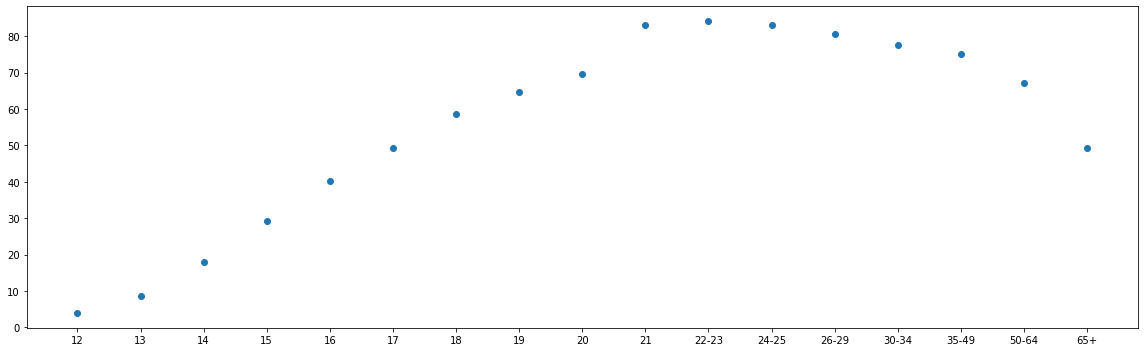

'Từ biểu đồ ta thấy tuổi càng cao thì tỉ lệ dùng rượu càng nhiều và chỉ có giảm đi một ít từ giai đoạn 26 tuổi trở đi.'

In [35]:
from scipy.stats import pearsonr
covariance_age_alcohol = np.cov([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 30, 35, 50, 65], df["alcohol-use"])
correlation_age_alcohol, p = pearsonr([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 30, 35, 50, 65], df["alcohol-use"])
# Biểu đồ
f, ax = plt.subplots(figsize=(16,5))
plt.scatter(data = df, x = "age", y = "alcohol-use")
plt.tight_layout()
plt.show()
"""Từ biểu đồ ta thấy tuổi càng cao thì tỉ lệ dùng rượu càng nhiều và chỉ có giảm đi một ít từ giai đoạn 26 tuổi trở đi."""

In [9]:
df

,age,count,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4,0.1,5,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15,0.1,1,0.0,3,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5,0.1,19.0
2,14,2792,18.1,5.0,8.7,24,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24,0.2,16.5
3,15,2956,29.2,6.0,14.5,25,0.5,4,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30,1.0,7,0.0,1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36,0.2,3.0
5,17,3038,49.3,13.0,28.0,36,2.0,5,0.1,21,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48,0.5,6.5
6,18,2469,58.7,24.0,33.7,52,3.2,5,0.4,10,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12,0.4,10.0
7,19,2223,64.6,36.0,33.4,60,4.1,5.5,0.5,2,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105,0.3,6.0
8,20,2271,69.7,48.0,34.0,60,4.9,8,0.6,5,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12,0.5,4.0
9,21,2354,83.2,52.0,33.0,52,4.8,5,0.5,17,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2,0.3,9.0
